<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/CNN_stock_v12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import seaborn as sns
import pandas_datareader.data as web
#!pip install finta
SID = '^TWII'
df = web.DataReader(SID,'yahoo',start="2000-01-01")
df = df.iloc[:,:5]

In [60]:
#!pip install --upgrade pandas
#!pip install --upgrade pandas-datareader

# 載入資料

In [61]:
print(df.shape)
df.head(3)

(5526, 5)


,High,Low,Open,Close,Volume
Date,,,,,
2000-01-04,8803.610352,8642.500000,8644.910156,8756.549805,0.0
2000-01-05,8867.679688,8668.019531,8690.599609,8849.870117,0.0
2000-01-06,9023.990234,8833.910156,8900.559570,8922.030273,0.0


In [62]:
df.tail(3)

,High,Low,Open,Close,Volume
Date,,,,,
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0


# Labeling(計算return)

In [63]:
#今天股價 = df['Close']
#昨天股價 = df['Close'].shift(1)
#df['return%'] = (今天股價/昨天股價-1)*100
#print(df['return%'].min(),df['return%'].max())
#sns.distplot(df['return%'].dropna())
#df.tail()

# Label triple_barrier

In [64]:
import numpy as np
import math
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

ret = triple_barrier(df.Close,1.03,0.97,20)['triple_barrier_signal']
df = df.join(ret)

In [65]:
df.tail(20)

,High,Low,Open,Close,Volume,triple_barrier_signal
Date,,,,,,
2022-06-06,16654.119141,16509.009766,16570.890625,16605.960938,2873700.0,-1
2022-06-07,16593.750000,16465.869141,16593.750000,16512.880859,2437900.0,0
2022-06-08,16702.990234,16538.669922,16538.669922,16670.509766,2409700.0,0
2022-06-09,16643.949219,16557.539062,16643.949219,16621.339844,2366400.0,0
2022-06-10,16581.810547,16403.330078,16581.810547,16460.119141,2373300.0,0
2022-06-13,16295.070312,16055.889648,16295.070312,16070.980469,3106700.0,0
2022-06-14,16067.799805,15869.059570,15975.169922,16047.370117,3086200.0,0
2022-06-15,16106.750000,15981.559570,16025.839844,15999.250000,2967000.0,0
2022-06-16,16209.250000,15838.290039,16098.290039,15838.610352,3636900.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


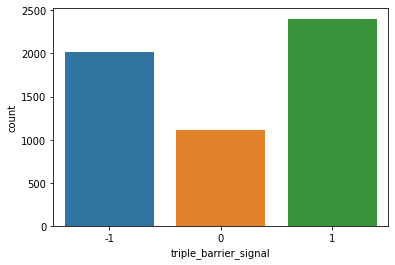

In [66]:
df['triple_barrier_signal'].value_counts()
sns.countplot(df['triple_barrier_signal'])

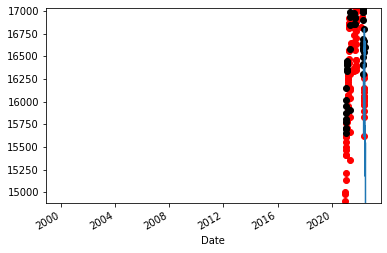

In [67]:
import matplotlib.pyplot as plt
buy = df[df['triple_barrier_signal']==1]['Close']
sell = df[df['triple_barrier_signal']==-1]['Close']
df['Close'][-40:].plot()#後20筆是前20筆的驗證
plt.scatter(buy.index,buy.values,color='red')
plt.scatter(sell.index,sell.values,color='black')
lb = df['Close'][-40:].mean() - 2*df['Close'][-40:].std()
ub = df['Close'][-40:].mean() + 2*df['Close'][-40:].std()
plt.ylim(lb,ub)
plt.show()

# 建立ohlcv

In [68]:
#!pip install finta

In [69]:
from finta import TA
ohlcv = df[['Open','High','Low','Close','Volume']]
ohlcv.columns = ['open','high','low','close','volume']

# 計算技術指標RSI

count    5525.000000
mean       52.626037
std        12.860694
min         9.948198
25%        43.227800
50%        53.319163
75%        61.954883
max       100.000000
Name: RSI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI
Date,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024


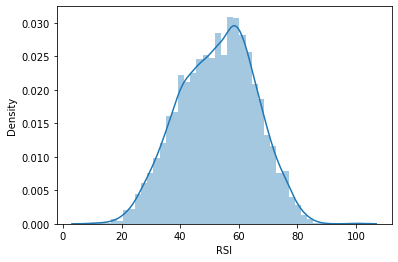

In [70]:
df['RSI'] = TA.RSI(ohlcv)
print(df['RSI'].describe())
sns.distplot(df['RSI'].dropna())
df.tail()

# 計算威廉指標

count    5513.000000
mean      -43.181634
std        31.983368
min      -100.000000
25%       -72.859483
50%       -38.054036
75%       -13.414271
max        -0.000000
Name: Williams %R, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R
Date,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653


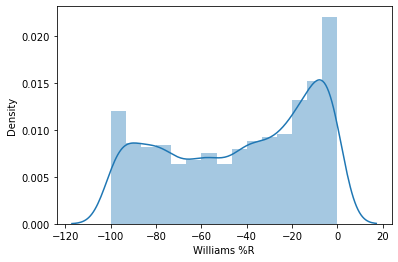

In [71]:
df['Williams %R'] = TA.WILLIAMS(ohlcv)
print(df['Williams %R'].describe())
sns.distplot(df['Williams %R'].dropna())
df.tail()

# SMA

count     5486.000000
mean      8466.730192
std       2968.212828
min       3821.469018
25%       6321.523414
50%       8064.533674
75%       9529.846864
max      18134.302258
Name: SMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA
Date,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223


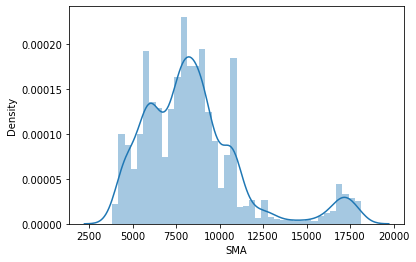

In [72]:
df['SMA'] = TA.SMA(ohlcv)
print(df['SMA'].describe())
sns.distplot(df['SMA'].dropna())
df.tail()

# EMA

count     5526.000000
mean      8491.923595
std       2993.840632
min       3570.937692
25%       6367.116755
50%       8106.745271
75%       9593.547125
max      18370.191557
Name: EMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA
Date,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728


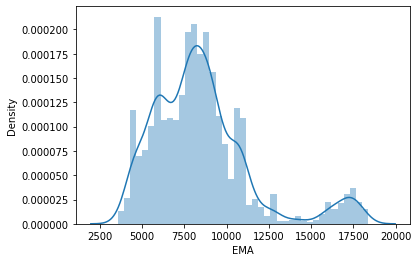

In [73]:
df['EMA'] = TA.EMA(ohlcv)
print(df['EMA'].describe())
sns.distplot(df['EMA'])
df.tail()

# WMA

count     5518.000000
mean      8492.936142
std       2999.872223
min       3527.999544
25%       6354.147941
50%       8102.258561
75%       9604.280789
max      18389.146615
Name: WMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA
Date,,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832,15453.200043
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650,15431.164909
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496,15381.601324
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891,15262.457422
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728,15064.906315


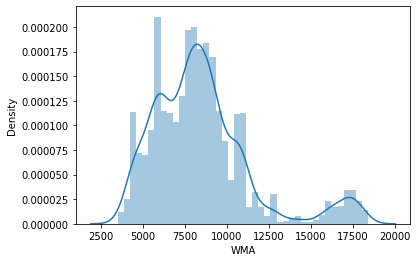

In [74]:
df['WMA'] = TA.WMA(ohlcv)
print(df['WMA'].describe())
sns.distplot(df['WMA'].dropna())
df.tail()

# HMA

count     5508.000000
mean      8493.979073
std       3009.712069
min       3433.914340
25%       6338.223372
50%       8093.720113
75%       9606.233005
max      18487.953184
Name: HMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA
Date,,,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832,15453.200043,15180.418257
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650,15431.164909,15183.806167
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496,15381.601324,15191.374920
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891,15262.457422,15142.022993
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728,15064.906315,14987.338208


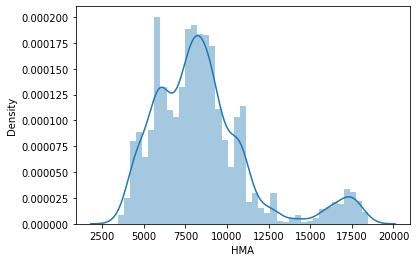

In [75]:
df['HMA'] = TA.HMA(ohlcv)
print(df['HMA'].describe())
sns.distplot(df['HMA'].dropna())
df.tail()

# TEMA

count     5526.000000
mean      8496.546081
std       3004.434690
min       3447.605265
25%       6355.046143
50%       8098.270048
75%       9596.925957
max      18516.770956
Name: TEMA, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA
Date,,,,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832,15453.200043,15180.418257,15281.052718
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650,15431.164909,15183.806167,15314.230014
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496,15381.601324,15191.374920,15246.683805
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891,15262.457422,15142.022993,15009.031995
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728,15064.906315,14987.338208,14631.131479


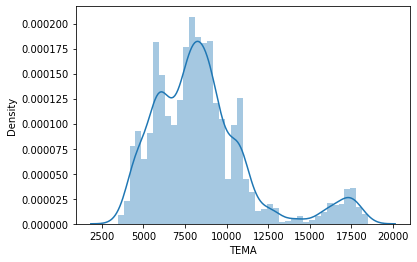

In [76]:
df['TEMA'] = TA.TEMA(ohlcv)
print(df['TEMA'].describe())
sns.distplot(df['TEMA'].dropna())
df.tail()

# CCI

count    5525.000000
mean       14.723634
std       111.336126
min      -421.723833
25%       -73.723145
50%        32.685170
75%       101.539987
max       405.786443
Name: CCI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI
Date,,,,,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832,15453.200043,15180.418257,15281.052718,-79.867441
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650,15431.164909,15183.806167,15314.230014,-83.985048
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496,15381.601324,15191.374920,15246.683805,-98.849615
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891,15262.457422,15142.022993,15009.031995,-131.133309
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728,15064.906315,14987.338208,14631.131479,-169.016877


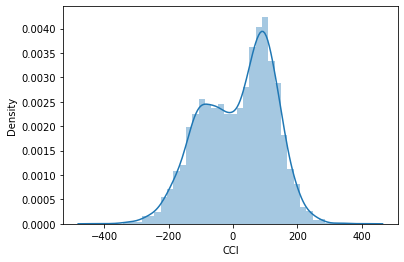

In [77]:
df['CCI'] = TA.CCI(ohlcv)
print(df['CCI'].describe())
sns.distplot(df['CCI'].dropna())
df.tail()

# CMO

count    5525.000000
mean        5.685529
std        30.193569
min       -86.464212
25%       -16.233830
50%         7.717903
75%        27.647871
max       100.000000
Name: CMO, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO
Date,,,,,,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832,15453.200043,15180.418257,15281.052718,-79.867441,-16.362177
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650,15431.164909,15183.806167,15314.230014,-83.985048,-21.123134
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496,15381.601324,15191.374920,15246.683805,-98.849615,-29.379157
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891,15262.457422,15142.022993,15009.031995,-131.133309,-43.103958
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728,15064.906315,14987.338208,14631.131479,-169.016877,-54.537852


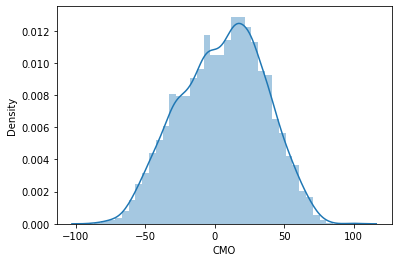

In [78]:
df['CMO'] = TA.CMO(ohlcv)
print(df['CMO'].describe())
sns.distplot(df['CMO'].dropna())
df.tail()

# MACD

count    5526.000000
mean       -0.211404
std        35.348204
min      -244.072759
25%       -19.237810
50%         0.738428
75%        20.385985
max       156.874065
Name: MACD, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD
Date,,,,,,,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832,15453.200043,15180.418257,15281.052718,-79.867441,-16.362177,-73.035001
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650,15431.164909,15183.806167,15314.230014,-83.985048,-21.123134,-56.878692
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496,15381.601324,15191.374920,15246.683805,-98.849615,-29.379157,-54.482683
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891,15262.457422,15142.022993,15009.031995,-131.133309,-43.103958,-74.408659
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728,15064.906315,14987.338208,14631.131479,-169.016877,-54.537852,-111.467095


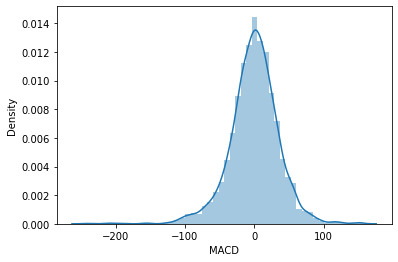

In [79]:
df['MACD'] = TA.MACD(ohlcv)['MACD'] - TA.MACD(ohlcv)['SIGNAL']
print(df['MACD'].describe())
sns.distplot(df['MACD'].dropna())
df.tail()

# PPO

count    5526.000000
mean       -0.001361
std         0.448993
min        -2.355901
25%        -0.249274
50%         0.002304
75%         0.245502
max         1.956600
Name: PPO, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO
Date,,,,,,,,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832,15453.200043,15180.418257,15281.052718,-79.867441,-16.362177,-73.035001,-0.466129
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650,15431.164909,15183.806167,15314.230014,-83.985048,-21.123134,-56.878692,-0.366598
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496,15381.601324,15191.374920,15246.683805,-98.849615,-29.379157,-54.482683,-0.354339
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891,15262.457422,15142.022993,15009.031995,-131.133309,-43.103958,-74.408659,-0.485836
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728,15064.906315,14987.338208,14631.131479,-169.016877,-54.537852,-111.467095,-0.731244


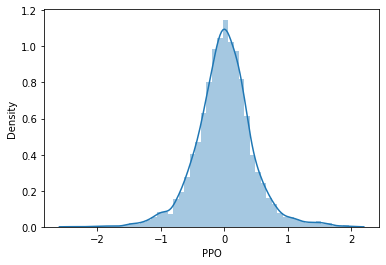

In [80]:
df['PPO'] = TA.PPO(ohlcv)['PPO'] - TA.PPO(ohlcv)['SIGNAL']
print(df['PPO'].describe())
sns.distplot(df['PPO'].dropna())
df.tail()

# ROC

count    5514.000000
mean        0.225718
std         4.678445
min       -23.361982
25%        -2.211977
50%         0.590734
75%         2.891210
max        23.364389
Name: ROC, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC
Date,,,,,,,,,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832,15453.200043,15180.418257,15281.052718,-79.867441,-16.362177,-73.035001,-0.466129,-6.457542
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650,15431.164909,15183.806167,15314.230014,-83.985048,-21.123134,-56.878692,-0.366598,-6.198006
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496,15381.601324,15191.374920,15246.683805,-98.849615,-29.379157,-54.482683,-0.354339,-5.169881
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891,15262.457422,15142.022993,15009.031995,-131.133309,-43.103958,-74.408659,-0.485836,-7.612709
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728,15064.906315,14987.338208,14631.131479,-169.016877,-54.537852,-111.467095,-0.731244,-10.351547


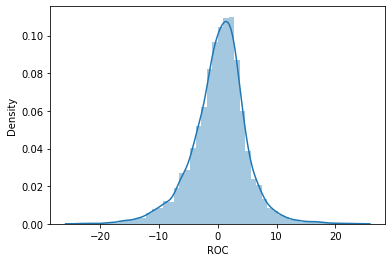

In [81]:
df['ROC'] = TA.ROC(ohlcv)
print(df['ROC'].describe())
sns.distplot(df['ROC'].dropna())
df.tail()

# CMFI

count    5.517000e+03
mean     2.958835e+10
std      1.646279e+10
min      0.000000e+00
25%      1.731695e+10
50%      3.679144e+10
75%      4.144593e+10
max      6.645785e+10
Name: CFI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI
Date,,,,,,,,,,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832,15453.200043,15180.418257,15281.052718,-79.867441,-16.362177,-73.035001,-0.466129,-6.457542,4.461345e+10
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650,15431.164909,15183.806167,15314.230014,-83.985048,-21.123134,-56.878692,-0.366598,-6.198006,4.446111e+10
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496,15381.601324,15191.374920,15246.683805,-98.849615,-29.379157,-54.482683,-0.354339,-5.169881,4.421878e+10
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891,15262.457422,15142.022993,15009.031995,-131.133309,-43.103958,-74.408659,-0.485836,-7.612709,4.374377e+10
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728,15064.906315,14987.338208,14631.131479,-169.016877,-54.537852,-111.467095,-0.731244,-10.351547,4.297863e+10


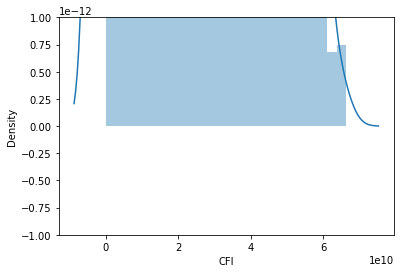

In [82]:
df['CFI'] = TA.CFI(ohlcv)
print(df['CFI'].describe())
sns.distplot(df['CFI'].dropna())
df.tail()

# DMI

count    5513.000000
mean       -0.324109
std        17.536521
min       -73.465234
25%       -12.277123
50%         0.218642
75%        11.648061
max        54.309679
Name: DMI, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI
Date,,,,,,,,,,,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832,15453.200043,15180.418257,15281.052718,-79.867441,-16.362177,-73.035001,-0.466129,-6.457542,4.461345e+10,-21.163840
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650,15431.164909,15183.806167,15314.230014,-83.985048,-21.123134,-56.878692,-0.366598,-6.198006,4.446111e+10,-20.533592
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496,15381.601324,15191.374920,15246.683805,-98.849615,-29.379157,-54.482683,-0.354339,-5.169881,4.421878e+10,-23.105933
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891,15262.457422,15142.022993,15009.031995,-131.133309,-43.103958,-74.408659,-0.485836,-7.612709,4.374377e+10,-31.029848
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728,15064.906315,14987.338208,14631.131479,-169.016877,-54.537852,-111.467095,-0.731244,-10.351547,4.297863e+10,-40.519510


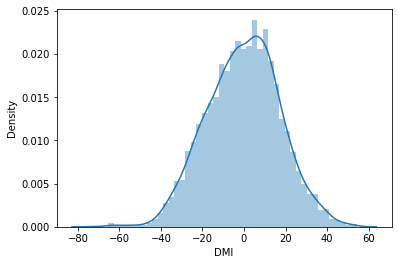

In [83]:
df['DMI'] = TA.DMI(ohlcv)['DI+'] - TA.DMI(ohlcv)['DI-']
print(df['DMI'].describe())
sns.distplot(df['DMI'].dropna())
df.tail()

# SAR

count     5526.000000
mean      8470.298780
std       2991.785893
min       3411.679932
25%       6320.355472
50%       8083.435124
75%       9604.997627
max      18619.609375
Name: SAR, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,High,Low,Open,Close,Volume,triple_barrier_signal,RSI,Williams %R,SMA,EMA,...,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-27,15656.349609,15409.080078,15409.080078,15548.009766,3120800.0,0,41.391919,-72.159677,16127.098776,15584.070832,...,15180.418257,15281.052718,-79.867441,-16.362177,-73.035001,-0.466129,-6.457542,4.461345e+10,-21.163840,15943.493488
2022-06-28,15533.339844,15375.650391,15519.559570,15439.919922,3094700.0,0,39.665249,-78.105168,16103.209485,15555.240650,...,15183.806167,15314.230014,-83.985048,-21.123134,-56.878692,-0.366598,-6.198006,4.446111e+10,-20.533592,15825.740455
2022-06-29,15365.540039,15218.070312,15365.540039,15240.129883,3239700.0,0,36.624122,-90.690243,16070.232660,15492.218496,...,15191.374920,15246.683805,-98.849615,-29.379157,-54.482683,-0.354339,-5.169881,4.421878e+10,-23.105933,15724.472846
2022-06-30,15147.769531,14825.730469,15146.919922,14825.730469,3673000.0,0,31.269009,-100.000000,16029.423638,15358.920891,...,15142.022993,15009.031995,-131.133309,-43.103958,-74.408659,-0.485836,-7.612709,4.374377e+10,-31.029848,15637.382702
2022-07-01,14812.129883,14336.030273,14812.129883,14343.080078,4290300.0,0,26.423024,-99.623653,15975.210223,15155.752728,...,14987.338208,14631.131479,-169.016877,-54.537852,-111.467095,-0.731244,-10.351547,4.297863e+10,-40.519510,15507.518345


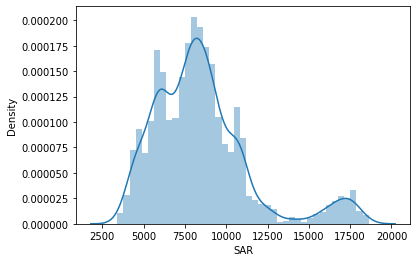

In [84]:
df['SAR'] = TA.SAR(ohlcv)
print(df['SAR'].describe())
sns.distplot(df['SAR'].dropna())
df.tail()

# columns選取

In [85]:
print(df.shape)
df = df.dropna(axis=0)#刪除有缺失的row,會缺失主要因為用時間rolling計算技術指標導致,正常的
features = df.columns[-15:].tolist() #取15個剛剛建立的技術指標當特徵
y_name = 'triple_barrier_signal' #當作labels
df = df[features+[y_name]]
print(df.shape)
df.tail()

(5526, 21)
(5486, 16)


,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-06-27,41.391919,-72.159677,16127.098776,15584.070832,15453.200043,15180.418257,15281.052718,-79.867441,-16.362177,-73.035001,-0.466129,-6.457542,4.461345e+10,-21.163840,15943.493488,0
2022-06-28,39.665249,-78.105168,16103.209485,15555.240650,15431.164909,15183.806167,15314.230014,-83.985048,-21.123134,-56.878692,-0.366598,-6.198006,4.446111e+10,-20.533592,15825.740455,0
2022-06-29,36.624122,-90.690243,16070.232660,15492.218496,15381.601324,15191.374920,15246.683805,-98.849615,-29.379157,-54.482683,-0.354339,-5.169881,4.421878e+10,-23.105933,15724.472846,0
2022-06-30,31.269009,-100.000000,16029.423638,15358.920891,15262.457422,15142.022993,15009.031995,-131.133309,-43.103958,-74.408659,-0.485836,-7.612709,4.374377e+10,-31.029848,15637.382702,0
2022-07-01,26.423024,-99.623653,15975.210223,15155.752728,15064.906315,14987.338208,14631.131479,-169.016877,-54.537852,-111.467095,-0.731244,-10.351547,4.297863e+10,-40.519510,15507.518345,0


# 相關性分析

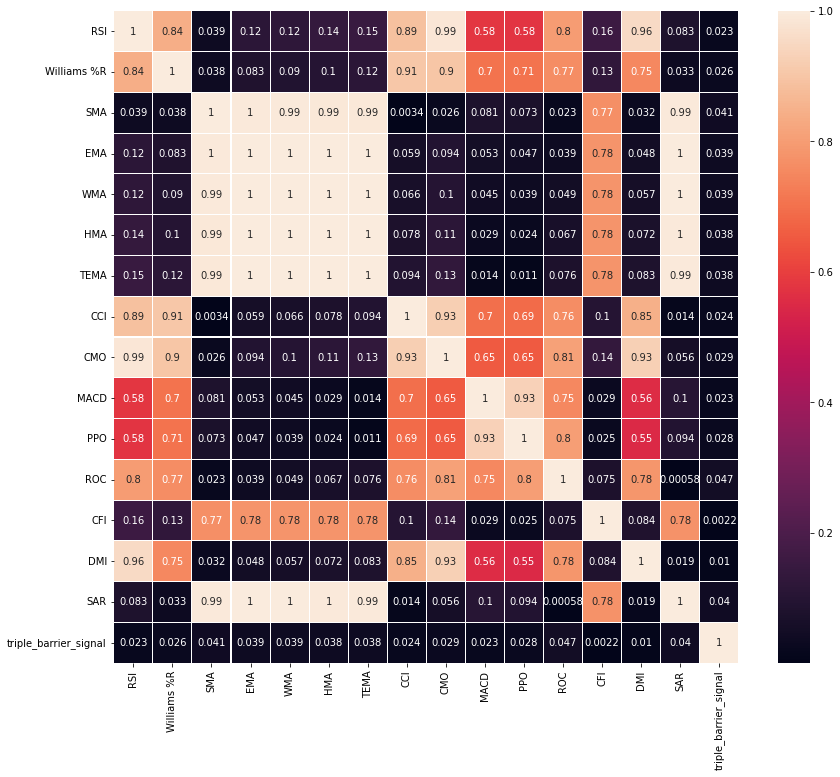

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,12))
sns.heatmap(abs(df.corr()),annot=True,linewidths=0.1)

# features scaling

In [87]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_minmax = min_max_scaler.fit_transform(df)#縮放到0-1之間
df_minmax = pd.DataFrame(df_minmax,
                         index = df.index,
                         columns = df.columns)#轉回dataframe格式
df_minmax[y_name] = df[y_name]#y不用MinMaxScaler
df_minmax.tail()

,RSI,Williams %R,SMA,EMA,WMA,HMA,TEMA,CCI,CMO,MACD,PPO,ROC,CFI,DMI,SAR,triple_barrier_signal
Date,,,,,,,,,,,,,,,,
2022-06-27,0.404991,0.278403,0.859762,0.811739,0.802441,0.780289,0.785276,0.413114,0.418253,0.426585,0.438208,0.361775,0.671305,0.409324,0.824032,0
2022-06-28,0.382751,0.218948,0.858093,0.809791,0.800959,0.780514,0.787477,0.408138,0.389847,0.466880,0.461288,0.367330,0.669012,0.414257,0.816289,0
2022-06-29,0.343582,0.093098,0.855789,0.805533,0.797624,0.781017,0.782995,0.390175,0.340589,0.472856,0.464130,0.389333,0.665366,0.394125,0.809630,0
2022-06-30,0.274609,0.000000,0.852938,0.796526,0.789606,0.777739,0.767224,0.351162,0.258702,0.423159,0.433638,0.337053,0.658218,0.332110,0.803903,0
2022-07-01,0.212193,0.003763,0.849150,0.782797,0.776313,0.767463,0.742146,0.305382,0.190484,0.330731,0.376732,0.278439,0.646705,0.257842,0.795364,0


In [88]:
df = df_minmax
print('特徵縮放完成!')

特徵縮放完成!


# Xs ,ys prepare

In [89]:
from tqdm import tqdm
import numpy as np

#定義觀察天數,起始index(0),結束index(資料筆數-觀察天數)
days = 15
b_index = 0
f_index = len(df)-days

#特徵欄位
features = df.drop(y_name,axis=1).columns.tolist()

#待存放序列
Xs = []
ys = []
indexs = []

'''
若資料筆數100,days=15天,f_index=85,i只會跑到84,i+days=99,features只會跑到98天.
若資料筆數100,days=15天,f_index=85+1,i會跑到85,i+days=100,features會跑到99天.
'''
for i in tqdm(range(b_index ,f_index+1 ,1)):#每次i都會遞增1
  X = df.iloc[i:i+days,:][features] #ex:0...14(不含15)之features
  y = df.iloc[i+days-1:i+days,:][y_name]#ex:14,y_name
  X = np.array(X) # to np_array
  Xs.append(X) #加入一筆X
  ys.append(y) #加入一筆y
  indexs.append((df.iloc[[i]].index,
                 df.iloc[[i+days-1]].index)) #加入資料日期
#轉換成np_array
Xs = np.array(Xs)
ys = np.array(ys)
print('準備完成')

100%|██████████| 5472/5472 [00:06<00:00, 807.24it/s]


準備完成


# check

In [90]:
print('資料筆數:',len(Xs))
print('第一筆的index開始和結束:{}-{}'.format(indexs[0][0].date[0],indexs[0][1].date[0]))
print('最後一筆的index開始和結束:{}-{}'.format(indexs[-1][0].date[0],indexs[-1][1].date[0]))

資料筆數: 5472
第一筆的index開始和結束:2000-03-08-2000-03-28
最後一筆的index開始和結束:2022-06-13-2022-07-01


# Reshape X

(圖片數量,長,寬,1張)

In [91]:
print(Xs.shape)
Xs = Xs.reshape(-1,days,len(features),1)
print(Xs.shape)

(5472, 15, 15)
(5472, 15, 15, 1)


# One hot encoding of label

原始y代表漲幅

In [92]:
print(ys.shape)
print(ys[:5])

from keras.utils.np_utils import to_categorical
ys = to_categorical(ys, num_classes = 3)
print(ys.shape)
print(ys[:5])

(5472, 1)
[[ 1]
 [ 1]
 [-1]
 [ 1]
 [-1]]
(5472, 3)
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]


# Visualization

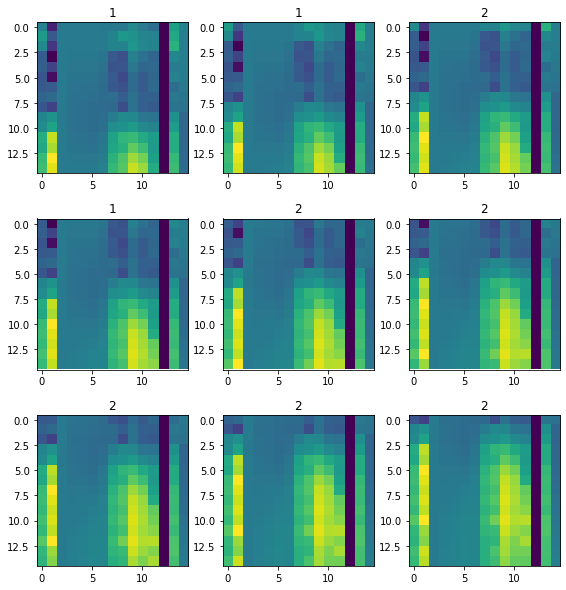

In [93]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
Xs_v = Xs.reshape(-1,Xs.shape[1],Xs.shape[2])
plt.figure(figsize=(10,10))
plt.subplots_adjust(wspace =0, hspace =0.3)
for i in range(0,9):
    plt.subplot(330 + (i+1))
    plt.imshow(Xs_v[i])
    plt.title(np.argmax(ys[i]))

# Split training and test sets

In [94]:
X_test = Xs[-40:] #最後40天features當作test資料
X_train,y_train = Xs[:-40],ys[:-40] #其他當作訓練
print(X_train.shape,y_train.shape,X_test.shape)

(5432, 15, 15, 1) (5432, 3) (40, 15, 15, 1)


# 調整採樣

In [97]:
X_train2維 = X_train.reshape(X_train.shape[0],-1)
y_train數字 = np.array([ np.argmax(i) for i in y_train])
print(X_train2維.shape)
print(y_train數字.shape)

from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler()
X_train平衡 ,y_train平衡 = ros.fit_resample(X_train2維 ,y_train數字)
print(pd.DataFrame(y_train平衡)[0].value_counts().sort_index())#顯示結果

X_train = X_train平衡.reshape(X_train平衡.shape[0],15,15,1)#資料數,15,15,1
y_train = y_train平衡.reshape(y_train平衡.shape[0],1)#資料數,1
y_train = to_categorical(y_train , num_classes = 3)#one_hot
print(X_train.shape)
print(y_train.shape)

(5432, 225)
(5432,)
0    1093
1    1093
2    1093
Name: 0, dtype: int64
(3279, 15, 15, 1)
(3279, 3)


# Split training and val sets

In [98]:
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(X_train,
                                              y_train, 
                                              test_size = 0.2,
                                              random_state = 42,
                                              shuffle = True,#是否洗牌
                                              stratify = y_train #是否根據y欄位做分層取樣
                                             )
print(xtrain.shape, ytrain.shape, xval.shape, yval.shape)

(2623, 15, 15, 1) (2623, 3) (656, 15, 15, 1) (656, 3)


# 看一下樣本的label分布情況是否平均(待解決)

0:Hold,1:Buy,2:Sell

In [99]:
pd.Series([np.argmax(i) for i in ys]).value_counts()

1    2371
2    1989
0    1112
dtype: int64

In [100]:
pd.Series([np.argmax(i) for i in y_train]).value_counts()

0    1093
1    1093
2    1093
dtype: int64

In [101]:
pd.Series([np.argmax(i) for i in ytrain]).value_counts()

2    875
0    874
1    874
dtype: int64

In [102]:
pd.Series([np.argmax(i) for i in yval]).value_counts()

0    219
1    219
2    218
dtype: int64

# CNN

In [107]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Lambda, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPool2D, AvgPool2D
from tensorflow.keras.optimizers import Adam #做梯度下降的一種優化方法
from keras.callbacks import ReduceLROnPlateau , EarlyStopping #減少學習速率 on Plateau

In [108]:
model = Sequential()

nclasses = 3 

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(15,15,1)))#15,15,32
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))#15,15,64
model.add(MaxPool2D(pool_size=(5,5)))# 3,3,64
model.add(Flatten())#576
model.add(Dropout(0.5))#288
model.add(Dense(128, activation='relu'))#128
model.add(Dropout(0.5))#64
model.add(Dense(32, activation='relu'))#32
model.add(Dropout(0.5))#16
model.add(Dense(nclasses, activation='softmax'))#3
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 15, 15, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 64)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 576)               0         
                                                                 
 dropout (Dropout)           (None, 576)               0         
                                                                 
 dense (Dense)               (None, 128)               73856     
                                                        

In [109]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 優化器

In [110]:
#1
lr_reduction = ReduceLROnPlateau(monitor = 'val_acc', 
                                 factor=0.5, 
                                 patience = 3, 
                                 verbose = 1, 
                                 min_lr = 0.00001)

#2
es = EarlyStopping(monitor='val_acc',#驗證集acc
                   min_delta=0, 
                   patience=50,  
                   mode='max',
                   restore_best_weights=True)#恢復最佳權重

# fit

In [111]:
history = model.fit(xtrain,ytrain,
                    batch_size = 128,
                    epochs = 500,
                    validation_data=(xval,yval),
                    verbose=1,callbacks=[es])

Epoch 1/500
21/21 [==============================] - 13s 47ms/step - loss: 1.1053 - accuracy: 0.3286 - val_loss: 1.0963 - val_accuracy: 0.4101
Epoch 2/500
21/21 [==============================] - 0s 13ms/step - loss: 1.0991 - accuracy: 0.3347 - val_loss: 1.0947 - val_accuracy: 0.4009
Epoch 3/500
21/21 [==============================] - 0s 17ms/step - loss: 1.0938 - accuracy: 0.3740 - val_loss: 1.0850 - val_accuracy: 0.4558
Epoch 4/500
21/21 [==============================] - 0s 17ms/step - loss: 1.0830 - accuracy: 0.3873 - val_loss: 1.0646 - val_accuracy: 0.4238
Epoch 5/500
21/21 [==============================] - 0s 15ms/step - loss: 1.0666 - accuracy: 0.3957 - val_loss: 1.0376 - val_accuracy: 0.4466
Epoch 6/500
21/21 [==============================] - 0s 17ms/step - loss: 1.0608 - accuracy: 0.4201 - val_loss: 1.0381 - val_accuracy: 0.4451
Epoch 7/500
21/21 [==============================] - 0s 18ms/step - loss: 1.0521 - accuracy: 0.4289 - val_loss: 1.0247 - val_accuracy: 0.4482
Epoch

# 訓練過程評估

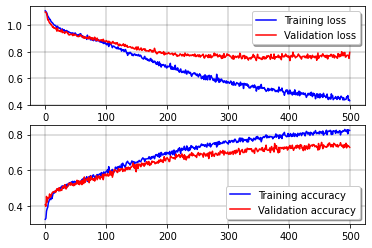

In [113]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation loss",axes =ax[0])
ax[0].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].grid(color='black', linestyle='-', linewidth=0.25)
legend = ax[1].legend(loc='best', shadow=True)

# 混淆矩陣

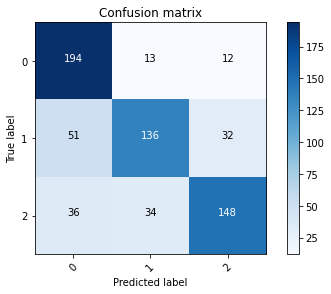

In [114]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#預測的y
ypred_onehot = model.predict(xval)
#轉換預測的y: [0 0 1 0 0 ...] --> 2
ypred = np.argmax(ypred_onehot,axis=1)
#轉換真實的y
ytrue = np.argmax(yval,axis=1)
#計算 confusion matrix
confusion_mtx = confusion_matrix(ytrue, ypred)
#畫出 confusion matrix
plot_confusion_matrix(confusion_mtx, classes=range(nclasses))

# 分類report

轉換預測結果

In [115]:
y_pred = model.predict(xval)
y_pred = [np.argmax(i) for i in y_pred]
y_pred = to_categorical(y_pred, num_classes = 3)
print(y_pred[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


真實y值

In [116]:
print(yval[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


# 分類報告

In [117]:
from sklearn.metrics import classification_report 
target_names = ['Hold','BUY','SELL']
print(classification_report(yval,y_pred,target_names=target_names))

              precision    recall  f1-score   support

        Hold       0.69      0.89      0.78       219
         BUY       0.74      0.62      0.68       219
        SELL       0.77      0.68      0.72       218

   micro avg       0.73      0.73      0.73       656
   macro avg       0.73      0.73      0.72       656
weighted avg       0.73      0.73      0.72       656
 samples avg       0.73      0.73      0.73       656



# plot error

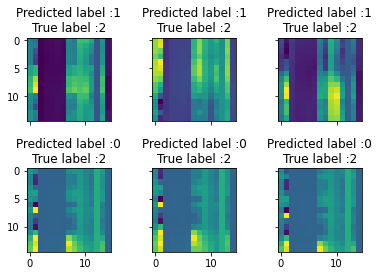

In [118]:
errors = (ypred - ytrue != 0)

ypred_er = ypred_onehot[errors]
ypred_classes_er = ypred[errors]
ytrue_er = ytrue[errors]
xval_er = xval[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)
    plt.subplots_adjust(wspace =0.5, hspace =0.5)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((days,len(features))))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# 錯誤預測的概率
ypred_er_prob = np.max(ypred_er,axis=1)

# Predicted probabilities of the true values in the error set
true_prob_er = np.diagonal(np.take(ypred_er, ytrue_er, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_er = ypred_er_prob - true_prob_er

# Sorted list of the delta prob errors
sorted_delta_er = np.argsort(delta_pred_true_er)

# Top 6 errors. You can change the range to see other images
most_important_er = sorted_delta_er[-6:]

# Show the top 6 errors
display_errors(most_important_er, xval_er, ypred_classes_er, ytrue_er)

## 預測最後40筆

In [119]:
answer = model.predict(X_test)
answer = [ np.argmax(i) for i in answer]
print(len(answer))

40


# 0~20筆

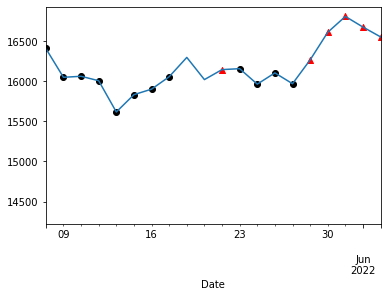

In [120]:
INDEX60 = df[-60:].index
C = web.DataReader(SID,'yahoo',start="2000-01-01")[['Close']]
C = C.loc[INDEX60,:]
C['SIGNAL'] = [np.nan for _ in range(20)] + answer #20個NAN+預測答案
buy = C[C['SIGNAL']==1]['Close']
sell = C[C['SIGNAL']==2]['Close']
C['Close'][20:40].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 20~40筆

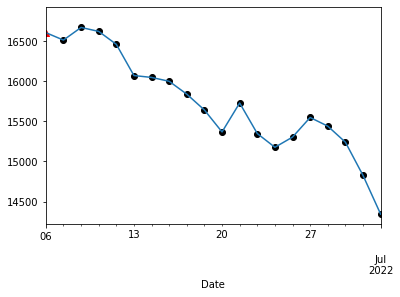

In [121]:
C['Close'][40:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 合併

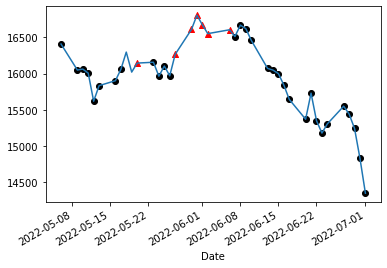

In [122]:
C['Close'][20:60].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

# 平滑版本

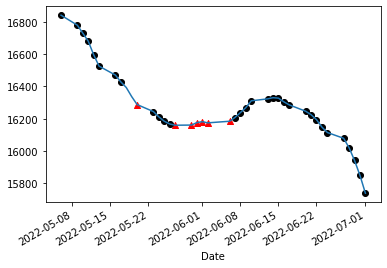

In [123]:
C_roll20 = pd.DataFrame(index=C.index)#空的dataframe index = 倒數60天股票日期
C_roll20['Close'] = C['Close'].rolling(20).mean()#收盤價做20天平滑
C_roll20['SIGNAL'] = C['SIGNAL']
buy = C_roll20[C_roll20['SIGNAL']==1]['Close']#買點
sell= C_roll20[C_roll20['SIGNAL']==2]['Close']#賣點
C_roll20['Close'][20:].plot()
plt.scatter(list(buy.index),list(buy.values),color='red',marker="^")
plt.scatter(list(sell.index),list(sell.values),color='black')

In [124]:
C = C.dropna(axis=0)
C

,Close,SIGNAL
Date,,
2022-05-06,16408.199219,2.0
2022-05-09,16048.919922,2.0
2022-05-10,16061.700195,2.0
2022-05-11,16006.250000,2.0
2022-05-12,15616.679688,2.0
2022-05-13,15832.540039,2.0
2022-05-16,15901.040039,2.0
2022-05-17,16056.089844,2.0
2022-05-18,16296.860352,0.0


In [125]:
np.set_printoptions(suppress=True)
C['HOLD%'] = model.predict(X_test)[:,0]
C['BUY%'] = model.predict(X_test)[:,1]
C['SELL%'] = model.predict(X_test)[:,2]
C.tail(10)

,Close,SIGNAL,HOLD%,BUY%,SELL%
Date,,,,,
2022-06-20,15367.580078,2.0,7.056578e-07,0.001544,0.998456
2022-06-21,15728.639648,2.0,1.336417e-04,0.003194,0.996672
2022-06-22,15347.750000,2.0,2.512762e-05,0.000197,0.999778
2022-06-23,15176.440430,2.0,1.122489e-04,0.000155,0.999733
2022-06-24,15303.320312,2.0,1.261942e-03,0.000637,0.998101
2022-06-27,15548.009766,2.0,1.680070e-01,0.001704,0.830289
2022-06-28,15439.919922,2.0,1.844736e-01,0.001198,0.814328
2022-06-29,15240.129883,2.0,1.017909e-01,0.002094,0.896115
2022-06-30,14825.730469,2.0,7.913965e-02,0.022880,0.897980


# save model

In [126]:
model.save('Rikcy_net.h5')
del model

In [127]:
from keras.models import load_model
model = load_model('Rikcy_net.h5')
predict = model.predict(X_test)

In [128]:
predict[-5:]

array([[0.16800702, 0.0017036 , 0.83028936],
       [0.18447357, 0.00119788, 0.8143285 ],
       [0.10179091, 0.00209445, 0.89611465],
       [0.07913965, 0.02288011, 0.8979802 ],
       [0.03060998, 0.00812378, 0.9612662 ]], dtype=float32)